<img align="left" src="https://ithaka-labs.s3.amazonaws.com/static-files/images/tdm/tdmdocs/tapi-logo-small.png" />

This notebook free for educational reuse under [Creative Commons CC BY License](https://creativecommons.org/licenses/by/4.0/).

Created by [Grant Glass](https://glassgrant.com) for the 2022 Text Analysis Pedagogy Institute, with support from the [National Endowment for the Humanities](https://neh.gov), [JSTOR Labs](https://labs.jstor.org/), and [University of Arizona Libraries](https://new.library.arizona.edu/).

For questions/comments/improvements, email grantg@live.unc.edu<br />
____

# Machine Learning

This is lesson `1` of 3 in the educational series on `Machine Learning`. This notebook is intended `to teach the basics of machine learning and introduce the concepts of:
<br>
1) What is Machine Learning?<br>
2) What is a Statistical Model?<br>
3) A framework for understanding ML<br>
4) Simple Example of ML <br> 

**Audience:** `Teachers` / `Learners` / `Researchers`

**Use case:** `Tutorial`

A tutorial is a carefully constructed example that takes the user by the hand through a series of steps to learn how a process works. Tutorials often use "toy" (or at least carefully constrained) examples that give reliable, accurate, and repeatable results every time.

**Difficulty:** `Intermediate`


`Intermediate assumes users are familiar with Python and have been programming for 6+ months. Code makes up a larger part of the notebook and basic concepts related to Python are not explained.`


**Completion time:** `90 minutes`

**Knowledge Required:** 
```
* Python basics (variables, flow control, functions, lists, dictionaries)
* Object-oriented programming (classes, instances, inheritance)
* Regular Expressions (`re`, character classes)

```

**Knowledge Recommended:**
```
* Basic file operations (open, close, read, write)
* Data cleaning with `Pandas`
```

**Learning Objectives:**
After this lesson, learners will be able to:
```
1. Describe and implement a simple Machine Learning Pipeline
2. Convert words into numbers in order to process text in machine learning.
3. Develop a workflow in order to answer a simple machine learning question.
4. Be familiar with Machine Learning resources for pursuing the topic
```
**Research Pipeline:**
```
1. Obtain Text and Research Question
2. **The skills in this notebook**
3. Cleaning up data and understanding results
4. Contextualizing results
```
___

# Required Python Libraries
* [Pandas](https://pandas.pydata.org/) for manipulating and cleaning data.
* [Sklearn](https://scikit-learn.org/stable/) for machine learning.
* [NLTK](https://www.nltk.org) for processing text.
* [RE](https://docs.python.org/3/library/re.html) for finding patterns in our text, usually for clean-up or search.
* [NUMPY](https://numpy.org) for calulcating complex equations (like precision and recall)
* [SEABORN](https://seaborn.pydata.org) visualization library.  


## Install Required Libraries

In [1]:
# Install software not already available
!pip install sklearn
!pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
### Install Libraries ###

# Library for Importing CSV file into a Dataframe
import pandas as pd
# Library to split the data into train and test sets
from sklearn.model_selection import train_test_split
# Libraries to process section_text Tokenize=find words, Stopwords=remove stopwords, Regular Expression=remove non-word characters, Lemmatize text
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
# A transformer LengthExtractor to extract length of each sentences in the section_text
from sklearn.base import BaseEstimator, TransformerMixin

# Machine Learning Libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

#Model Tuning Libraries
from sklearn.model_selection import GridSearchCV

#Evaluation Libraries
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Allows the use of display() for DataFrames
from IPython.display import display
# Pretty display for notebooks
%matplotlib inline

#Ignore warnings = clean notebook
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Grab NLTK (Natural Language Tool Kit) libraries
#Stopwords (words we want to ignore)
nltk.download('stopwords')
#Punkt is a tokenizer that divides a text into a list of sentences by using an unsupervised algorithm to build a model for abbreviation words, collocations, and words that start sentences. 
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [4]:
from nltk.corpus import stopwords
#what other languages are stopwords available in
print(stopwords.fileids())

['arabic', 'azerbaijani', 'basque', 'bengali', 'catalan', 'chinese', 'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'greek', 'hebrew', 'hinglish', 'hungarian', 'indonesian', 'italian', 'kazakh', 'nepali', 'norwegian', 'portuguese', 'romanian', 'russian', 'slovene', 'spanish', 'swedish', 'tajik', 'turkish']


# Required Data

**Data Title**
* training_set_v2.csv

**Data Format:** 
* Comma-separated values  (.csv)

**Data Source:**
* [On the Books Project](https://onthebooks.lib.unc.edu)

**Data Quality/Bias:**
`The training set was created by using multiple sources: [1] Murray, Pauli. 1951. States’ Laws on Race and Color: And Appendices Containing International Documents, Federal Laws and Regulations, Local Ordinances and Charts. Cincinnati: Woman’s Division of Christian Service, Board of Missions and Church Extension, Methodist Church. [2] Paschal, Richard. 2020. Jim Crow in North Carolina The Legislative Program from 1865 to 1920. Durham: Carolina Academic Press. [3] A random sample of North Carolina laws enacted between 1866-1967 were assessed by scholars William Sturkey and Kimber Thomas to be either "Jim Crow" or "Not Jim Crow". [4] Team member James Dick reviewed the laws for consistency between the scholars' assessments.`

**Data Description:**

`This lesson uses the training set data in csv format from` [On the Books](https://cdr.lib.unc.edu/concern/data_sets/6q182v788?locale=en)

## Loading Required Data

In [ ]:
dataframe = pd.read_csv('training_set_v2.csv')

In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1785 entries, 0 to 1784
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1785 non-null   object
 1   source        1785 non-null   object
 2   jim_crow      1785 non-null   int64 
 3   type          1785 non-null   object
 4   chapter_num   1785 non-null   int64 
 5   section_num   1785 non-null   int64 
 6   chapter_text  1785 non-null   object
 7   section_text  1785 non-null   object
dtypes: int64(3), object(5)
memory usage: 111.7+ KB


In [ ]:
dataframe.head()

,id,source,jim_crow,type,chapter_num,section_num,chapter_text,section_text
0,1947_session laws_979_2,murray,1,session laws,978,1,CHAPTER 978 AN ACT AUTHORIZING THE MEMBERS OF ...,Subject only to restrictions and conditions no...
1,1935_public laws_423_3,murray,1,public laws,422,2,CHAPTER 422 AN ACT TO PROVIDE A RENTAL SYSTEM ...,Powers and duties of Commission. The said Text...
2,1933_public laws_173_26,murray,1,public laws,172,25,"CHAPTER 172 AN ACT TO AMEND CHAPTER TWO, PUBLI...",The Commission shall provide separate sleeping...
3,1927_public laws_163_5,murray,1,public laws,162,4,CHAPTER 162 AN ACT RELATING TO THE ORGANIZATIO...,"That the said corporation shall receive, train..."
4,1927_public laws_163_4,murray,1,public laws,162,3,CHAPTER 162 AN ACT RELATING TO THE ORGANIZATIO...,That the five members of said Board of Directo...


# Introduction

```

* Why is Machine Learning useful? 
* Why should we learn it? 
* Who might use it? 
* Where has it been used by scholars/industry?
* What do we need to do it?

```

# No Code Example of Machine Learning

Head to the Google Teachable Machine Website: https://teachablemachine.withgoogle.com

The Teachable Machine website provides an easy to use interface for training image, sound, and pose classification models. No login is required to get started. Training data files can be loaded directly from your computer or from your computer’s webcam or microphone. Models can be exported to use in other projects, and the FAQ (https://cloud.google.com/inclusive-ml/) includes links to read more about fairness and inclusion in ML.

Take a look at this project involving training a model to detect how ripe a piece of fruit is: https://medium.com/@warronbebster/teachable-machine-tutorial-bananameter-4bfffa765866


How do you think the computer figures out ripeness?

What exactly are we teaching the machine?

What other humanistic data could we use for this type of machine learning?

## Key Concept One - What is MACHINE LEARNING?

Machine Learning is a field of study which harnesses principles of computer science and statistics to create statistical models. These models are generally used to do two things:

1. Prediction: make predictions about the future based on data about the past
2. Inference: discover patterns in data

What is the difference between this and AI?
There is no universally agreed upon distinction between ML and artificial intelligence (AI). AI usually concentrates on programming computers to make decisions (based on ML models and sets of logical rules), whereas ML focuses more on making predictions about the future. They are highly interconnected fields, and, for most non-technical purposes, they are the same.

## Key Concept Two - What is A STATISTICAL MODEL?

**Models:** Teaching a computer to make predictions involves feeding data into machine learning models, which are representations of how the world supposedly works. If I tell a statistical model that the world works a certain way (say, for example, that two story homes are more expensive than one story homes), then this model can then tell me what be more expensive, a ranch style home or a cape cod. 

What does a model actually look like? Surely the concept of a model makes sense in the abstract, but knowing this is just half the battle. You should also know how it’s represented inside of a computer, or what it would look like if you wrote it down on paper.

A model is just a mathematical function, which is merely a relationship between a set of inputs and a set of outputs. Here’s an example:

f(x) = x²

This is a function that takes as input a number and returns that number squared. So, f(1) = 1, f(2) = 4, f(3) = 9.

Let’s briefly return to the example of the model that predicts home price from home stories. I may believe, based on what I’ve seen in the world, that given a home's price is, on average, equal to the house's stories times 100,000. 

This model can be represented mathematically as follows:

Price = Stories × $100,000

In other words, income is a function of stories.

**Here’s the main point:** Machine learning refers to a set of techniques for estimating functions (like the one involving income) based on datasets (pairs of heights and their associated incomes). These functions, which are called models, can then be used for predictions of future data.

**Algorithms:** These functions are estimated using algorithms. In this context, an algorithm is a predefined set of steps that takes as input a bunch of data and then transforms it through mathematical operations. You can think of an algorithm like a recipe — first do this, then do that, then do this. Done.
Machine learning of all types uses models and algorithms as its building blocks to make predictions and inferences about the world.
Now I’ll show you how models actually work by breaking them apart, component by component. This next part is important.

## Key Concept Three - A Machine Learning Framework

**Inputs:** Statistical models learn from the past, formatted as structured tables of data (called **training data**). These datasets — such as those you might find in Excel sheets — tend to be formatted in a very structured, easy-to-understand way: each row in the dataset represents an individual **observation,** also called a datum or measurement, and each column represents a different **feature**, also called a predictor, of an observation.

For example, you might imagine a dataset about people, in which each row represents a different person, and each column represents a different feature about that person: profession, age, income, etc.

Most traditional models accept data formatted in the way I’ve just described. We call this structured data.

Because one common goal of ML is to make predictions, training data also includes a column containing the data you want to predict. This feature is called the response variable (or output variable, or dependent variable) and looks just like any other feature in the table.

Most common statistical models are constructed using a technique called supervised learning, which uses data that includes a response variable to make predictions or do inference. There is also a branch of ML called unsupervised learning, which doesn’t require a response variable and which is generally used just to find interesting patterns between variables (this pattern-finding process is known as inference). It is just as important as supervised learning, but it is usually much harder to understand and also less common in practice. This document won’t talk much about the latter subfield. The takeaway from this paragraph is simply that there are two “types” of learning, and that supervised learning is more common.


Model selection: We have our data, and we’ve decided that there’s probably a relationship between our predictors and our response. We’re ready to make predictions.

As an aside, we don’t actually need to know if there’s a relationship between these variables. We could, in fact, just throw all of our data into an algorithm and see if the resulting model is able to make valid predictions.
Now we need to pick which model to use. Naturally, there are many different types of models which explain how the data actually works, and we’d like to choose the one that most accurately describes the relationship between the predictors and the response variable.

Models generally fall into one of two categories:
**Regression models**, which are used when the response variable (i.e. the variable that you’re predicting) is continuous. For example, height, age, and income are all continuous. That is, they can be placed and ordered on a number line.
**Classification models**, which are used for categorical data — that is, data that doesn’t have a numerical ordering. For example, you may want to predict, based on an image of a flower, the species of that flower. Or you may want to predict whether a student is a psychology major or a math major.
The first step in picking a model is deciding whether or not your response variable is quantitative or categorical.


Why is model selection an important concept for non-technical people? 

Well, if a model is chosen poorly, then its predictions will be inaccurate!


# Example: Machine Learning with the On the Books Project

In [ ]:
dataframe.sample()

,id,source,jim_crow,type,chapter_num,section_num,chapter_text,section_text
490,1959_session laws_1066_3,project experts,0,session laws,1065,2,CHAPTER 1065 AN ACT TO AUTHORIZE THE ISSUANCE ...,At the close of the polls the election officer...


Before the file was imported, we performed simple preprocessing on the text (these are outlined in the code bellow):
* Replaced hyphenated and line broken words with unbroken words.
* Removed section numbering from the law text ("section_text").
* We used session or volume identified ("csv") information to extract a numeric year.  In the case of multi-year volumes (e.g. 1956-1957) the earlier year was used.

In [ ]:
#Fix hyphenated words
#data["chapter_text"] = data.text.str.replace(r"-[ \|]+(?P<letter>[a-zA-Z])",repl).astype("str")
#data["section_text"] = data.section_text.str.replace(r"-[ \|]+(?P<letter>[a-zA-Z])",repl).astype("str")
#data["section_text"] = [re.sub(r'- *\n+(\w+ *)', r'\1\n',r) for r in data["section_text"]]


#Remove section titles (e.g. "Sec. 1") from law text.
#data["start"] = data.section_raw.str.len().fillna(0).astype("int")
#data["section_text"] = data.apply(lambda x: x['section_text'][(x["start"]):], axis=1).str.strip()

## Data Exploration

In [ ]:
dataframe['jim_crow'].value_counts()

0    1273
1     512
Name: jim_crow, dtype: int64

In [ ]:
# Total number of records
n_records = len(dataframe.index)

# jim crow laws
jim_crow_laws = len(dataframe[dataframe.jim_crow == 1])

# non-jim crow laws
regular_laws = len(dataframe[dataframe.jim_crow == 0])

# Percent of Jim Crow Laws
jimcrow_percent = (jim_crow_laws / float(n_records)) * 100

# Print the results
print("Total number of records: {}".format(n_records))
print("Jim Crow Laws: {}".format(jim_crow_laws))
print("Non-Jim Crow Laws: {}".format(regular_laws))
print("Percentage of Jim Crow Laws: {}%".format(jimcrow_percent))

Total number of records: 1785
Jim Crow Laws: 512
Non-Jim Crow Laws: 1273
Percentage of Jim Crow Laws: 28.68347338935574%


## Preparing the Data
Before data can be used as input for machine learning algorithms, it often must be cleaned, formatted, and restructured — this is typically known as **preprocessing**. Fortunately, for this dataset, there are no invalid or missing entries we must deal with, however, there are some qualities about certain features that must be adjusted. This preprocessing can help tremendously with the outcome and predictive power of nearly all learning algorithms.

In [ ]:
# Split the data into features and target label
features = dataframe['section_text']
target = dataframe['jim_crow']

### Shuffle and Split Data
Now all _categorical variables_ have been converted into numerical features, and all numerical features have been normalized. As always, we will now split the data (both features and their labels) into training and test sets. 80% of the data will be used for training and 20% for testing.

Run the code cell below to perform this split.

In [ ]:
# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 1428 samples.
Testing set has 357 samples.


### Data Preprocessing

In [ ]:
#Text Processing
# extract the english stopwords and save it to a variable
stopword = stopwords.words('english')
# define regular expression to identify non-ascii characters in text
non_ascii_regex = r'[^\x00-\x7F]+'
def tokenize(text):
        
    # use library re to replace non ascii characters by a space
    text = re.sub(non_ascii_regex, ' ', text)  

    # use word_tokenize to tokenize the sentences
    tokens = word_tokenize(text)
    
    # instantiate an object of class WordNetLemmatizer
    lemmatizer = WordNetLemmatizer()

    # use a list comprehension to lemmatize the tokens and remove the the stopwords
    clean_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stopword]

    # return the tokens
    return clean_tokens

What is Tokenization? 
Tokenization is the process of breaking text into smaller pieces called tokens. These smaller pieces can be sentences, words, or sub-words. For example, the sentence “I won” can be tokenized into two word-tokens “I” and “won”.
Let's take a look at the many ways you can tokenize text.

In [36]:
import nltk
from nltk.tokenize import (TreebankWordTokenizer,
                           word_tokenize,
                           wordpunct_tokenize,
                           TweetTokenizer)

In [38]:
sentence = "It's true, Machine learning is fun! #machinelearning"

In [39]:
print(f'Whitespace tokenization = {sentence.split()}')

Whitespace tokenization = ["It's", 'true,', 'Machine', 'learning', 'is', 'fun!', '#machinelearning']


In [40]:
print(f'Punctuation-based tokenization = {wordpunct_tokenize(sentence)}')

Punctuation-based tokenization = ['It', "'", 's', 'true', ',', 'Machine', 'learning', 'is', 'fun', '!', '#', 'machinelearning']


In [42]:
tokenizer = TweetTokenizer()
print(f'Tweet-rules based tokenization = {tokenizer.tokenize(sentence)}')

Tweet-rules based tokenization = ["It's", 'true', ',', 'Machine', 'learning', 'is', 'fun', '!', '#machinelearning']


In [43]:
tokenizer = TreebankWordTokenizer()
print(f'Default/Treebank tokenization = {tokenizer.tokenize(sentence)}')

Default/Treebank tokenization = ['It', "'s", 'true', ',', 'Machine', 'learning', 'is', 'fun', '!', '#', 'machinelearning']


Lemmatization is the process of grouping the inflected forms of a word in order to analyze them as a single word in linguistics. 



In [47]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [48]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet 

lemmatizer = WordNetLemmatizer()
 
print("love :", lemmatizer.lemmatize("loves", wordnet.VERB))
print("loving :", lemmatizer.lemmatize("loving", wordnet.VERB))
print("loved :", lemmatizer.lemmatize("loved", pos=wordnet.VERB))

love : love
loving : love
loved : love


### Transformer of text = turning text into numbers

In [ ]:
# A transformer LengthExtractor to extract length of each sentences in the section_text and make that a feature
class LengthExtractor(BaseEstimator, TransformerMixin):
    
    def compute_length(self, text):
        sentence_list = word_tokenize(text)
        return len(sentence_list)
    
    def fit(self, x, y=None):
        return self

    def transform(self, X):
        X_length = pd.Series(X).apply(self.compute_length)
        return pd.DataFrame(X_length)

#Possible other features

#number of sections--as a feature....
#how much material is in a chapter
#how long each section is

## What does vectorization (turning words into numbers) do?

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# list of text documents
text = ["The quick red fox jumped over the lazy dog."]
# create the transform
vectorizer = CountVectorizer()
# tokenize and build vocab
vectorizer.fit(text)
# summarize
print(vectorizer.vocabulary_)
# encode document
vector = vectorizer.transform(text)
# summarize encoded vector
print(vector.shape)
print(type(vector))
print(vector.toarray())

{'the': 7, 'quick': 5, 'red': 6, 'fox': 1, 'jumped': 2, 'over': 4, 'lazy': 3, 'dog': 0}
(1, 8)
<class 'scipy.sparse.csr.csr_matrix'>
[[1 1 1 1 1 1 1 2]]


We can see that there are 8 words in the vocab, and therefore encoded vectors have a length of 8.

We can then see that the encoded vector is a sparse matrix. Finally, we can see an array version of the encoded vector showing a count of 1 occurrence for each word except the (index and id 7) that has an occurrence of 2

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
# list of text documents
text = ["The quick red fox jumped over the lazy dog.", "The dog.", "The fox"]
# create the transform
vectorizer = TfidfVectorizer()
# tokenize and build vocab
vectorizer.fit(text)
# summarize
print(vectorizer.vocabulary_)
print(vectorizer.idf_)
# encode document
vector = vectorizer.transform([text[0]])
# summarize encoded vector
print(vector.shape)
print(vector.toarray())

{'the': 7, 'quick': 5, 'red': 6, 'fox': 1, 'jumped': 2, 'over': 4, 'lazy': 3, 'dog': 0}
[1.28768207 1.28768207 1.69314718 1.69314718 1.69314718 1.69314718
 1.69314718 1.        ]
(1, 8)
[[0.27674503 0.27674503 0.36388646 0.36388646 0.36388646 0.36388646
  0.36388646 0.42983441]]


A vocabulary of 8 words is learned from the documents and each word is assigned a unique integer index in the output vector.
The inverse document frequencies are calculated for each word in the vocabulary, assigning the lowest score of 1.0 to the most frequently observed word: “the” at index 7.
Finally, the first document is encoded as an 8-element sparse array

While namy vectorizers are English based, there have been many scholars that have investigated the use of other languages.

For example:
https://investigate.ai/text-analysis/how-to-make-scikit-learn-natural-language-processing-work-with-japanese-chinese/


----
## Training our Model

### Creating a Training and Predicting Pipeline

In [ ]:
# create an instance of Pipeline class
pipeline = Pipeline([
    
        # create a FeatureUnion pipeline
        ('features', FeatureUnion([

            # add a pipeline element to extract features using CountVectorizer and TfidfTransformer
            ('text_pipleline', Pipeline([
                ('vect', CountVectorizer(decode_error = "ignore",
                      min_df = 2, max_df = 1000)),
                ('tfidf', TfidfTransformer()),
            ])),
            
            # add the pipeline element - LengthExtractor to extract lenght of each sentence as feature
            ('text_len', LengthExtractor()),
        ])),

        # use the predictor estimator RandomForestClassifier to train the model
        ('dlf', RandomForestClassifier())
])

max_df is used for removing terms that appear too frequently and min_df is used for removing terms that appear too infrequently.

In our example we are saying we don't want to consider terms that appear in less that 2 documents and words that appear in more than 1,000

Random forest, like its name implies, consists of a large number of individual decision trees that operate as an ensemble. Each individual tree in the random forest spits out a class prediction and the class with the most votes becomes our model’s prediction

https://towardsdatascience.com/understanding-random-forest-58381e0602d2

###  Supervised Learning Models
**The following are some of the supervised learning models that are currently available in** [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html) **that you may choose from:**
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Stochastic Gradient Descent Classifier (SGDC)
- Support Vector Machines (SVM)
- Logistic Regression

In [ ]:
#Run the Model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('text_pipleline',
                                                 Pipeline(steps=[('vect',
                                                                  CountVectorizer(decode_error='ignore',
                                                                                  max_df=1000,
                                                                                  min_df=2)),
                                                                 ('tfidf',
                                                                  TfidfTransformer())])),
                                                ('text_len',
                                                 LengthExtractor())])),
                ('dlf', RandomForestClassifier())])

### Initial Model Evaluation

#### What is accuracy, precision, recall?

** Accuracy ** measures how often the classifier makes the correct prediction. It’s the ratio of the number of correct predictions to the total number of predictions (the number of test data points).

** Precision ** tells us what proportion of messages we classified as Jim Crow, actually were Jim Crow.
It is a ratio of true positives(laws classified as Jim Crow, and which are actually Jim Crow) to all positives(all laws classified as Jim Crow, irrespective of whether that was the correct classificatio), in other words it is the ratio of

`[True Positives/(True Positives + False Positives)]`

** Recall(sensitivity)** tells us what proportion of laws that actually were Jim Crow were classified by us as Jim Crow.
It is a ratio of true positives(laws classified as Jim Crow, and which are actually Jim Crow) to all the laws that were actually Crow, in other words it is the ratio of

`[True Positives/(True Positives + False Negatives)]`

These two metrics can be combined to get the F1 score, which is weighted average(harmonic mean) of the precision and recall scores. This score can range from 0 to 1, with 1 being the best possible F1 score(we take the harmonic mean as we are dealing with ratios). We can use **F-beta score** as a metric that considers both precision and recall:


$$ F_{\beta} = (1 + \beta^2) \cdot \frac{precision \cdot recall}{\left( \beta^2 \cdot precision \right) + recall} $$

In particular, when $\beta = 0.5$, more emphasis is placed on precision. This is called the **F$_{0.5}$ score** (or F-score for simplicity).

Another Resource for understanding this report: https://medium.com/@kohlishivam5522/understanding-a-classification-report-for-your-machine-learning-model-88815e2ce397


In [ ]:
#Make Predictions on the Test Data
y_pred = pipeline.predict(X_test)

[Text(0.5, 1.0, 'Overall')]

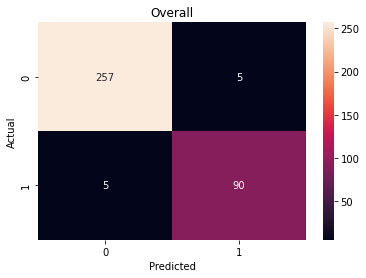

In [ ]:
# count the number of labels
labels = np.unique(y_pred)

data = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'

# use sns.heatmap on top of confusion_matrix to show the confusion matrix
ax = sns.heatmap(df_cm,xticklabels=True, annot=True, fmt='.0f')
ax.set(title="Overall")

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       262
           1       0.95      0.95      0.95        95

    accuracy                           0.97       357
   macro avg       0.96      0.96      0.96       357
weighted avg       0.97      0.97      0.97       357



### Naive Predictor Performace
* If we chose a model that always predicted if a law was jim crow, what would  that model's accuracy and F-score be on this dataset?

** Please note ** that the the purpose of generating a naive predictor is simply to show what a base model without any intelligence would look like. In the real world, ideally your base model would be either the results of a previous model or could be based on a research paper upon which you are looking to improve. When there is no benchmark model set, getting a result better than random choice is a place you could start from.

** NOTE: ** 

* When we have a model that always predicts '1' (i.e. there is always a jim crow law) then our model will have no True Negatives(TN) or False Negatives(FN) as we are not making any negative('0' value) predictions. Therefore our Accuracy in this case becomes the same as our Precision(True Positives/(True Positives + False Positives)) as every prediction that we have made with value '1' that should have '0' becomes a False Positive; therefore our denominator in this case is the total number of records we have in total. 
* Our Recall score(True Positives/(True Positives + False Negatives)) in this setting becomes 1 as we have no False Negatives.

In [ ]:
#Calculate Accuracy, Recall, Precision
accuracy = (np.sum(target)) / ((np.sum(target)) + float(((target.count()) - np.sum(target))))
recall = np.sum(target) / float((np.sum(target) + 0))
precision = np.sum(target) / float(((np.sum(target) + ((target.count()) - np.sum(target)))))

#Calculate F-score using the formula above for beta = 0.5 and correct values for precision and recall.
beta = 0.5
fscore = (1+ beta**2) * (precision * recall) / ((beta ** 2 * precision) + recall)

#Print the results 
print("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))

Naive Predictor: [Accuracy score: 0.2868, F-score: 0.3346]


# Model Improvement

How can we make our model better?



Take a Look at the data! Is there a way to make it better? Include more metadata?

In [28]:
#Load CSV into Panadas Dataframe
dataframe = pd.read_csv('training_set_v2_alpha_3.csv')

In [29]:
dataframe.head()

,csv,chapter_index,section_index,chapter_num,section_num,csv_filled,reviewer,sample,Assessment,Explicit_Implicit_Extrinsic,type,sess,chapter_text,section_text,first_jpg_url,pdf_url,chapter,section,section_text_raw
0,lawsresolutionso1879nort_public laws_data_aggr...,277,2,276,1,lawsresolutionso1879nort_public_laws_data_aggr...,paschal,pre-existing,1,1.0,public laws,1879,CHAPTER 276 AN ACT TO AUTHORIZE THE BOARD OF E...,That the board of education of the counties of...,https://archive.org/download/lawsresolutionso1...,https://archive.org/download/lawsresolutionso1...,CHAPTER 276,Section 1,Section 1 That the board of education of the c...
1,lawsresolutionso1880nort_public laws special_d...,28,4,27,3,lawsresolutionso1880nort_public_laws_special_d...,paschal,pre-existing,1,1.0,public laws,1880,CHAPTER 27 AN ACT TO AUTHORIZE THE ESTABLISHME...,The special taxes thus levied and collected fr...,https://archive.org/download/lawsresolutionso1...,https://archive.org/download/lawsresolutionso1...,CHAPTER 27,Src. 3,Src. 3 The special taxes thus levied and colle...
2,lawsresolutionso1880nort_public laws special_d...,28,9,27,8,lawsresolutionso1880nort_public_laws_special_d...,paschal,pre-existing,1,1.0,public laws,1880,CHAPTER 27 AN ACT TO AUTHORIZE THE ESTABLISHME...,The board of commissioners for the county of W...,https://archive.org/download/lawsresolutionso1...,https://archive.org/download/lawsresolutionso1...,CHAPTER 27,Sec. 8,Sec. 8 The board of commissioners for the coun...
3,lawsresolutionso1881nort_public laws_data_aggr...,201,23,200,22,lawsresolutionso1881nort_public_laws_data_aggr...,paschal,pre-existing,1,1.0,public laws,1881,CHAPTER 200 AN ACT TO REVISE AND CONSOLIDATE T...,The county board of education of every county ...,https://archive.org/download/lawsresolutionso1...,https://archive.org/download/lawsresolutionso1...,CHAPTER 200,Src. 22.,Src. 22 The county board of education of every...
4,lawsresolutionso1881nort_public laws_data_aggr...,201,33,200,32,lawsresolutionso1881nort_public_laws_data_aggr...,paschal,pre-existing,1,1.0,public laws,1881,CHAPTER 200 AN ACT TO REVISE AND CONSOLIDATE T...,The county treasurer of each county shall repo...,https://archive.org/download/lawsresolutionso1...,https://archive.org/download/lawsresolutionso1...,CHAPTER 200,Sxc. 32.,Sxc. 32 The county treasurer of each county sh...


In [30]:
#Make the Explicit_Implicit_Extrinsic column a 0 or a 1, so we can use it as a feature.
dataframe.Explicit_Implicit_Extrinsic.value_counts()
dataframe = dataframe.loc[dataframe.Explicit_Implicit_Extrinsic.isin([0,1]),:]
#Create a year column from the sess column
dataframe['year'] = dataframe['sess'].astype(str).str[:4].astype('int64')
#One hot encode the type variable, make different columns of types of laws with a 0-not included, 1-included
dataframe = pd.get_dummies(dataframe, columns=['type'])
#Create a dataframe from the types of laws organized by year
categorical_cols =  dataframe.select_dtypes(include=['uint8'])

1. More Features

In [31]:
#Create a copy of dataframe with the features we are going to use: year and section text.
features = dataframe.loc[:,['year','section_text']].copy()
#Add our categorical_colmuns to the features dataframe
features = pd.concat([features, categorical_cols], axis=1)
#Our target is the Assessment column-what laws are Jim Crow and which aren't, this is what we want to the "machine to learn about"
target = dataframe['Assessment']
#Create a sample dataframe to use
samp = dataframe['sample']

In [32]:
# split the data into train and test sets
X_train, X_test, y_train, y_test, train_samp, test_samp = train_test_split(features, target, samp, test_size=0.2, random_state=25)

In [34]:
#Text Processing
# extract the english stopwords and save it to a variable
stopword = stopwords.words('english')
# define regular expression to identify non-ascii characters in text
non_ascii_regex = r'[^\x00-\x7F]+'
def tokenize(text):
        
    # use library re to replace non ascii characters by a space
    text = re.sub(non_ascii_regex, ' ', text)  

    # use word_tokenize to tokenize the sentences
    tokens = word_tokenize(text)
    
    # instantiate an object of class WordNetLemmatizer
    lemmatizer = WordNetLemmatizer()

    # use a list comprehension to lemmatize the tokens and remove the the stopwords
    clean_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stopword]

    # return the tokens
    return clean_tokens

# A transformer LengthExtractor to extract length of each sentences in the section_text and make that a feature
class LengthExtractor(BaseEstimator, TransformerMixin):
    
    def compute_length(self, text):
        sentence_list = word_tokenize(text)
        return len(sentence_list)
    
    def fit(self, x, y=None):
        return self

    def transform(self, X):
        X_length = pd.Series(X).apply(self.compute_length)
        return pd.DataFrame(X_length)

# A transformer SelectColumns to select what columns we use the transformer on
class SelectColumnsTransformer(BaseEstimator, TransformerMixin):
    
    def __init__(self, columns=None):
        self.columns = columns

    def transform(self, X, **transform_params):
        out = X[self.columns].copy()
        return out

    def fit(self, X, y=None, **fit_params):
        return self

2. Try a new algorythm 

In [35]:
from xgboost import XGBClassifier

# create an instance of Pipeline class
pipeline = Pipeline([
    
        # create a FeatureUnion pipeline
        ('features', FeatureUnion([

            # add a pipeline element to extract features using CountVectorizer and/or TfidfTransformer
            ('text_pipeline', Pipeline([
                ('get_text', SelectColumnsTransformer("section_text")),
                ('vect', CountVectorizer(decode_error = "ignore",
                      min_df = 2, max_df = 0.8)),
                ('tfidf', 'passthrough'),
            ])), 
            # LengthExtractor to extract length of each law as feature
            ('text_len', Pipeline([
                ('get_text', SelectColumnsTransformer("section_text")),
                ('length', LengthExtractor())
            ])),
            #Using metadata categories as a feature
            ('metadata', SelectColumnsTransformer(['type_private laws', 'type_public laws',
                                        'type_public local laws','type_session laws','year']))
        ])),

        # use the predictor estimator XGBC to train the model
        ('dlf',XGBClassifier(tree_method="hist"))
])

3. Fine Tune Parameters and Model

In [36]:
model2params = {'dlf__colsample_bytree': 0.38802577686511047,
 'dlf__gamma': 0.20211144034640516,
 'dlf__learning_rate': 0.13027378372211787,
 'dlf__max_depth': 4.0,
 'dlf__min_child_weight': 1.0,
 'dlf__scale_pos_weight': 3.0,
 'features__text_len': Pipeline(steps=[('get_text', SelectColumnsTransformer(columns='section_text')),
                 ('length', LengthExtractor())]),
 'features__text_pipeline__vect__lowercase': True,
 'features__text_pipeline__vect__max_df': 0.7538214490256765,
 'features__text_pipeline__vect__min_df': 4.0,
 'features__text_pipeline__vect__ngram_range': (1, 4)}

model2params['features__text_pipeline__vect__min_df'] = int(model2params['features__text_pipeline__vect__min_df'])
model2params['dlf__max_depth'] = int(model2params['dlf__max_depth'])
model2params['dlf__min_child_weight'] = int(model2params['dlf__min_child_weight'])
model2params['dlf__scale_pos_weight'] = int(model2params['dlf__scale_pos_weight'])

best_model = pipeline
best_model.set_params(**model2params)

Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('text_pipeline',
                                                 Pipeline(steps=[('get_text',
                                                                  SelectColumnsTransformer(columns='section_text')),
                                                                 ('vect',
                                                                  CountVectorizer(decode_error='ignore',
                                                                                  max_df=0.7538214490256765,
                                                                                  min_df=4,
                                                                                  ngram_range=(1,
                                                                                               4))),
                                                                 ('tfidf',
                                                        

In [37]:
#Hyperparameter tuning
from hyperopt import hp, tpe, space_eval, Trials
from hyperopt.fmin import fmin

#Model Tuning Libraries
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.calibration import CalibratedClassifierCV

# A function that ensures the most effective parameters are used in our training
def objective(params):
    params['features__text_pipeline__vect__min_df'] = int(params['features__text_pipeline__vect__min_df'])
    params['dlf__max_depth'] = int(params['dlf__max_depth'])
    params['dlf__min_child_weight'] = int(params['dlf__min_child_weight'])
    params['dlf__scale_pos_weight'] = int(params['dlf__scale_pos_weight'])
    pipeline.set_params(**params)
    
    score = 1-cross_val_score(pipeline, X_train, y_train, scoring="f1", n_jobs=-1).mean()
    print("F1 {:.4f} params {}".format((1-score), params))
    return score

space = {
    'features__text_pipeline__vect__min_df': hp.quniform ('features__text_pipeline__vect__min_df',2,20,1),
    'features__text_pipeline__vect__lowercase': hp.choice('features__text_pipeline__vect__lowercase',[True,False]),
    'features__text_pipeline__vect__ngram_range': hp.choice('features__text_pipeline__vect__ngram_range',[(1,1),(1,2),(1,3),(1,4)]),
    'features__text_pipeline__vect__max_df': hp.uniform('features__text_pipeline__vect__max_df',0.6,0.8),
    'features__text_len':hp.choice('features__text_len',[Pipeline([
            ('get_text', SelectColumnsTransformer("section_text")),
            ('length', LengthExtractor())
        ])]),
    'dlf__max_depth': hp.quniform('dlf__max_depth', 2, 10, 1),
    'dlf__min_child_weight': hp.quniform('dlf__min_child_weight', 1, 5, 1),
    'dlf__colsample_bytree': hp.uniform('dlf__colsample_bytree', 0.3, 1.0),
    'dlf__learning_rate': hp.uniform('dlf__learning_rate', 0.05, 1),
    'dlf__scale_pos_weight': hp.quniform('dlf__scale_pos_weight',1,8,1),
    'dlf__gamma': hp.uniform('dlf__gamma',0,2)
    
}

trials = Trials()
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=1000,
           trials=trials)

F1 0.9274 params {'dlf__colsample_bytree': 0.4322614495945696, 'dlf__gamma': 0.8314652988914073, 'dlf__learning_rate': 0.7985116045572488, 'dlf__max_depth': 7, 'dlf__min_child_weight': 4, 'dlf__scale_pos_weight': 7, 'features__text_len': Pipeline(steps=[('get_text', SelectColumnsTransformer(columns='section_text')),
                ('length', LengthExtractor())]), 'features__text_pipeline__vect__lowercase': True, 'features__text_pipeline__vect__max_df': 0.6476717871790211, 'features__text_pipeline__vect__min_df': 5, 'features__text_pipeline__vect__ngram_range': (1, 2)}
F1 0.9424 params {'dlf__colsample_bytree': 0.7246603110443428, 'dlf__gamma': 1.373472399920647, 'dlf__learning_rate': 0.5453917338076311, 'dlf__max_depth': 3, 'dlf__min_child_weight': 4, 'dlf__scale_pos_weight': 8, 'features__text_len': Pipeline(steps=[('get_text', SelectColumnsTransformer(columns='section_text')),
                ('length', LengthExtractor())]), 'features__text_pipeline__vect__lowercase': True, 'feature

In [39]:
params = space_eval(space, best)
params['features__text_pipeline__vect__min_df'] = int(params['features__text_pipeline__vect__min_df'])
params['dlf__max_depth'] = int(params['dlf__max_depth'])
params['dlf__min_child_weight'] = int(params['dlf__min_child_weight'])
params['dlf__scale_pos_weight'] = int(params['dlf__scale_pos_weight'])

In [40]:
model2params = {'dlf__colsample_bytree': 0.38802577686511047,
 'dlf__gamma': 0.20211144034640516,
 'dlf__learning_rate': 0.13027378372211787,
 'dlf__max_depth': 4.0,
 'dlf__min_child_weight': 1.0,
 'dlf__scale_pos_weight': 3.0,
 'features__text_len': Pipeline(steps=[('get_text', SelectColumnsTransformer(columns='section_text')),
                 ('length', LengthExtractor())]),
 'features__text_pipeline__vect__lowercase': True,
 'features__text_pipeline__vect__max_df': 0.7538214490256765,
 'features__text_pipeline__vect__min_df': 4.0,
 'features__text_pipeline__vect__ngram_range': (1, 4)}

model2params['features__text_pipeline__vect__min_df'] = int(model2params['features__text_pipeline__vect__min_df'])
model2params['dlf__max_depth'] = int(model2params['dlf__max_depth'])
model2params['dlf__min_child_weight'] = int(model2params['dlf__min_child_weight'])
model2params['dlf__scale_pos_weight'] = int(model2params['dlf__scale_pos_weight'])

best_model = pipeline
best_model.set_params(**model2params)

Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('text_pipeline',
                                                 Pipeline(steps=[('get_text',
                                                                  SelectColumnsTransformer(columns='section_text')),
                                                                 ('vect',
                                                                  CountVectorizer(decode_error='ignore',
                                                                                  max_df=0.7538214490256765,
                                                                                  min_df=4,
                                                                                  ngram_range=(1,
                                                                                               4))),
                                                                 ('tfidf',
                                                        

[Text(0.5, 1.0, 'Overall')]

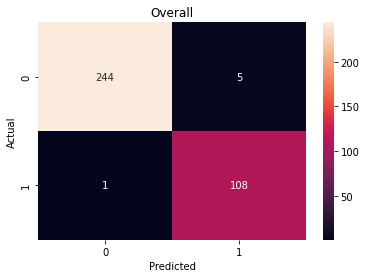

In [41]:
y_pred = best_model.fit(X_train,y_train).predict(X_test)

# count the number of labels
labels = np.unique(y_pred)

data = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'

# use sns.heatmap on top of confusion_matrix to show the confusion matrix
ax = sns.heatmap(df_cm,xticklabels=True, annot=True, fmt='.0f')
ax.set(title="Overall")

In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       249
           1       0.96      0.99      0.97       109

    accuracy                           0.98       358
   macro avg       0.98      0.99      0.98       358
weighted avg       0.98      0.98      0.98       358



In [43]:
refit = best_model.fit(dataframe,dataframe.Assessment)

In [44]:
print(classification_report(dataframe.Assessment, refit.predict(dataframe)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1275
           1       1.00      1.00      1.00       513

    accuracy                           1.00      1788
   macro avg       1.00      1.00      1.00      1788
weighted avg       1.00      1.00      1.00      1788



In [45]:
corpus = pd.read_csv("main_laws_list.csv")
corpus = corpus.loc[corpus.section_text.notnull(),:]
corpus['year'] = corpus['sess'].astype(str).str[:4].astype('int64')
#Convert to Integer
corpus = pd.get_dummies(corpus, columns=['type'])
full_pred = refit.predict(corpus)
raw_prob = refit.predict_proba(corpus)[:,1]

In [46]:
corpus["model_prediction"] = full_pred
corpus["raw_prob"] = raw_prob

full_corpus = pd.read_csv("main_laws_list.csv")
full_corpus = pd.merge(full_corpus, corpus, how="left")
full_corpus = pd.merge(full_corpus, 
                       dataframe[["csv","chapter_index","section_index",
                                  "Assessment","Explicit_Implicit_Extrinsic",
                                 "reviewer", "sample"]], how="left")

# full_corpus.to_csv("model2_main_laws_list.csv", index=False)
full_corpus.loc[full_corpus.model_prediction==1,:].sort_values(by=["raw_prob"],
                                                               ascending=False).to_csv("model_hyperopt3_JC_main_laws_list.csv", 
                                                                                       index=False)

jc_clean = full_corpus.loc[full_corpus.model_prediction==1,:].sort_values(by=["raw_prob"],ascending=False)
jc_clean.loc[:,"section_text"] = jc_clean.section_text.str.slice(stop=32000)
jc_clean.to_csv("model3_JC_main_laws_list_CLEAN.csv", index=False)

with open("model3_params.txt","w") as outfile:
    outfile.write(str(params))

In [47]:
jc_clean = full_corpus.loc[full_corpus.model_prediction==1,:].sort_values(by=["raw_prob"],ascending=False)
jc_clean = jc_clean[["csv","type","chapter_index","section_index",'first_jpg_url', 'pdf_url',
                     "chapter_text","section_text","raw_prob","Assessment"]]
jc_clean["More_Text"] = jc_clean.section_text.str.replace("\\n","",regex=True).str.len()>30000
jc_clean.loc[:,"section_text"] = jc_clean.section_text.str.replace("\\n","",regex=True).str.slice(stop=30000)
jc_clean.loc[jc_clean.Assessment.isnull(),:].to_csv("model3_JC_main_laws_list_NEW.csv", index=False, encoding="utf-8-sig")

In [48]:
vect_names = dict(refit.named_steps["features"].transformer_list).get("text_pipeline").named_steps["vect"].get_feature_names()
other = ["text_len", 'type_private laws', 'type_public laws','type_public local laws','type_session laws','year']
other = ["META_"+k for k in other]
len(vect_names+other)

24864

In [49]:
train_trf = pd.DataFrame.sparse.from_spmatrix(refit.named_steps["features"].transform(dataframe))
train_trf.columns = vect_names+other

In [50]:
scores = refit.named_steps["dlf"].get_booster().get_score(importance_type="gain")
max_score = max(scores.values())
min_score = min(scores.values())
top_vars = [int(k.replace("f","")) for k in scores.keys() if scores[k]>10]

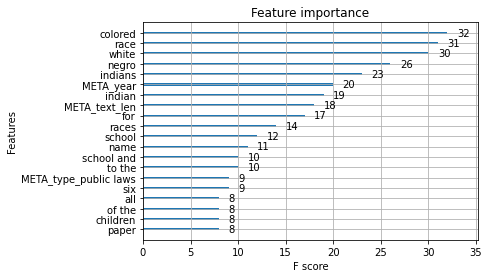

In [51]:
import xgboost
%matplotlib inline
refit.named_steps["dlf"].get_booster().feature_names = vect_names+other
xgboost.plot_importance(refit.named_steps["dlf"].get_booster(), max_num_features = 20)

# Exercises (Try your own model)

`Now that you know how to train a basic model, try to use your own dataset.`

In [5]:
dataframe = pd.read_csv('imdb_top_1000.csv') #replace your_dataset.csv with your own file name

In [6]:
dataframe.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [7]:
# Split the data into features and target label
features = dataframe['Overview'] #this is the text in your csv your want to categorize or predict
target = dataframe['Genre'] #this is your label in your csv you want to predict to

In [8]:
# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 800 samples.
Testing set has 200 samples.


In [9]:
#Text Processing
# extract the english stopwords and save it to a variable
stopword = stopwords.words('english')
# define regular expression to identify non-ascii characters in text
non_ascii_regex = r'[^\x00-\x7F]+'
def tokenize(text):
        
    # use library re to replace non ascii characters by a space
    text = re.sub(non_ascii_regex, ' ', text)  

    # use word_tokenize to tokenize the sentences
    tokens = word_tokenize(text)
    
    # instantiate an object of class WordNetLemmatizer
    lemmatizer = WordNetLemmatizer()

    # use a list comprehension to lemmatize the tokens and remove the the stopwords
    clean_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stopword]

    # return the tokens
    return clean_tokens

In [10]:
# A transformer LengthExtractor to extract length of each sentences in the section_text and make that a feature
class LengthExtractor(BaseEstimator, TransformerMixin):
    
    def compute_length(self, text):
        sentence_list = word_tokenize(text)
        return len(sentence_list)
    
    def fit(self, x, y=None):
        return self

    def transform(self, X):
        X_length = pd.Series(X).apply(self.compute_length)
        return pd.DataFrame(X_length)

In [11]:
# create an instance of Pipeline class
pipeline = Pipeline([
    
        # create a FeatureUnion pipeline
        ('features', FeatureUnion([

            # add a pipeline element to extract features using CountVectorizer and TfidfTransformer
            ('text_pipleline', Pipeline([
                ('vect', CountVectorizer(decode_error = "ignore",
                      min_df = 2, max_df = 1000)),
                ('tfidf', TfidfTransformer()),
            ])),
            
            # add the pipeline element - LengthExtractor to extract lenght of each sentence as feature
            ('text_len', LengthExtractor()),
        ])),

        # use the predictor estimator RandomForestClassifier to train the model
        ('dlf', RandomForestClassifier())
])

In [12]:
#Run the Model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('text_pipleline',
                                                 Pipeline(steps=[('vect',
                                                                  CountVectorizer(decode_error='ignore',
                                                                                  max_df=1000,
                                                                                  min_df=2)),
                                                                 ('tfidf',
                                                                  TfidfTransformer())])),
                                                ('text_len',
                                                 LengthExtractor())])),
                ('dlf', RandomForestClassifier())])

In [14]:
#Make Predictions on the Test Data
y_pred = pipeline.predict(X_test)

In [16]:
print(classification_report(y_test, y_pred))

                              precision    recall  f1-score   support

           Action, Adventure       0.00      0.00      0.00         3
   Action, Adventure, Comedy       0.00      0.00      0.00         0
    Action, Adventure, Drama       0.20      0.33      0.25         3
  Action, Adventure, Mystery       0.00      0.00      0.00         1
   Action, Adventure, Sci-Fi       0.00      0.00      0.00         7
  Action, Adventure, Western       0.00      0.00      0.00         2
    Action, Biography, Crime       0.00      0.00      0.00         1
    Action, Biography, Drama       0.00      0.00      0.00         2
       Action, Comedy, Crime       0.00      0.00      0.00         1
     Action, Comedy, Fantasy       0.00      0.00      0.00         1
        Action, Crime, Drama       0.00      0.00      0.00         3
      Action, Drama, Mystery       0.00      0.00      0.00         1
     Action, Drama, Thriller       0.00      0.00      0.00         1
      Action, Drama

In [ ]:
print(classification_report(y_test, y_pred))

# Questions and Errors
`Please Share any questions or troubles you have with the code in this google document`
https://docs.google.com/document/d/10XQ9zn_IEQDWKq65LK9rUatvwZliTw71pTh1vXBYMF8/edit?usp=sharing



# Living Bilbiography


https://docs.google.com/document/d/13iyDS6R3keRxyJTrFOD42As6rEOg8vIdnhXyN21A6z4/edit?usp=sharing

# Next Lesson



___
[Proceed to next lesson: Course Machine Learning 2/3 ->](./day2_intro_to_ml.ipynb)